In [1]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14116\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


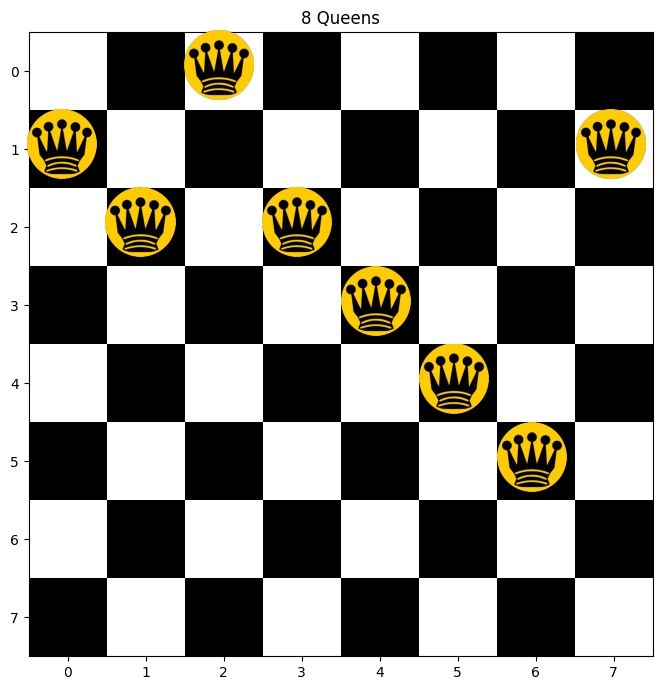

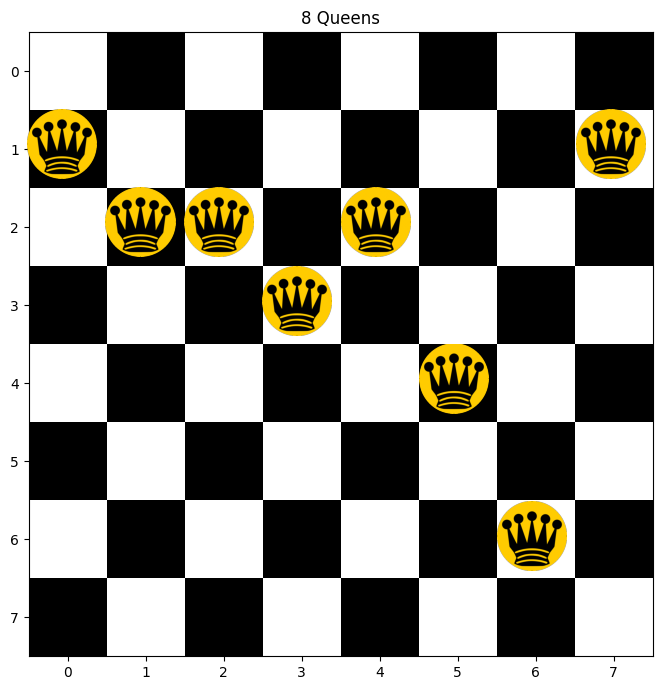

Final State (Stochastic Hill Climbing): [2, 0, 7, 6, 3, 1, 5, 3]
Attacks: 6


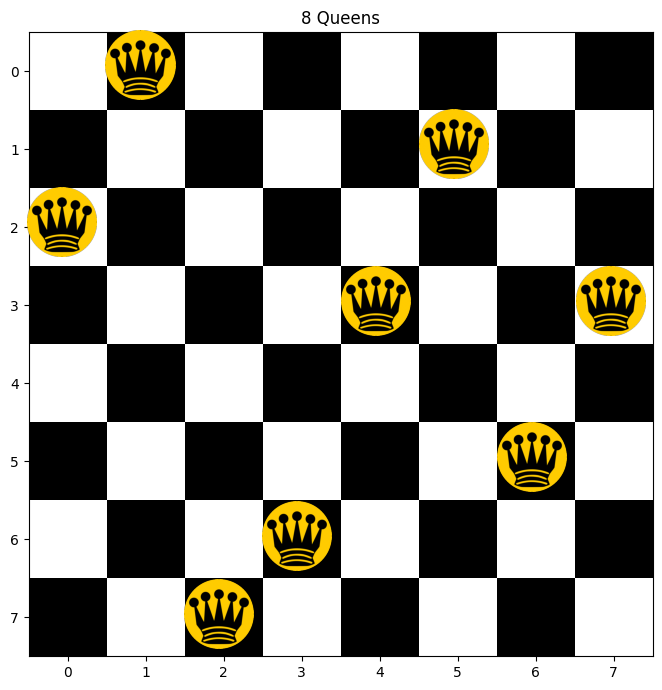

In [3]:
"""
Use this block to do your assignment
"""
initial_state = [1,2,0,2,3,4,5,1] #do not use this state. Initialize random position to each queen.
nqp = NQueensProblem(len(initial_state)) #give number of queens as an argument.
plot_NQueens(initial_state) # to print the state everytime something changes. You can give an array of position of each queen.
plot_NQueens( [1,2,2,3,2,4,6,1])
import random

def compute_attacks(board):
    attacks = 0
    for i in range(len(board)):
        for j in range(i + 1, len(board)):
            if board[i] == board[j] or abs(board[i] - board[j]) == j - i:
                attacks += 1
    return attacks

# Successor function: generate a new board configuration by randomly moving any queen to another place in its column
def generate_successor(board):
    new_board = list(board)
    col = random.randint(0, len(board) - 1)
    new_row = random.randint(0, len(board) - 1)
    new_board[col] = new_row
    return new_board

# Stochastic Hill Climbing algorithm
def stochastic_hill_climbing(initial_state, max_iterations=1000, prob=0.1):
    current_state = initial_state
    current_attacks = compute_attacks(current_state)
    
    for _ in range(max_iterations):
        successor = generate_successor(current_state)
        successor_attacks = compute_attacks(successor)
        
        if successor_attacks <= current_attacks or random.random() < prob:
            current_state = successor
            current_attacks = successor_attacks
        
        if current_attacks == 0:
            break
    
    return current_state, current_attacks

random.seed(41)

# Generate a random initial state for the 8-Queen problem
n = 8 
initial_state = [random.randint(0, n - 1) for _ in range(n)]

final_state, attacks = stochastic_hill_climbing(initial_state)
print("Final State (Stochastic Hill Climbing):", final_state)
print("Attacks:", attacks)

plot_NQueens(final_state)
